In [831]:
import re #정규 표현식 모듈
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime      # datatime 라이브러리
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize

%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/Dataton/netflix_titles.csv')

In [832]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 살펴보기

In [833]:
df = pd.DataFrame(data)
df.drop(['show_id','director'],axis=1,inplace=True)
#df.head()

In [834]:
df.isnull().sum()

type              0
title             0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [835]:
print(df.dtypes) 

type            object
title           object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [836]:
dataFilter_TV = df['type'] == 'TV Show'
df[dataFilter_TV]

df_TV = df[dataFilter_TV]

In [837]:
df_TV.head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [838]:
df_TV.isnull().sum()

type              0
title             0
cast            350
country         391
date_added       10
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [839]:
df_TV.shape

(2676, 10)

In [840]:
dataFilter_Movie = df['type'] == 'Movie'
df[dataFilter_Movie]

df_Movie = df[dataFilter_Movie]

## 나라 결측치 다루기

In [841]:
#df_TV[df_TV['country'].isnull()]
#df_TV[df_TV['country'].isnull()].iloc[0:78].fillna("A",inplace =True)
df_TV['country'].fillna("America",inplace =True,limit =79)
df_TV['country'].fillna("Africa",inplace =True,limit =78)
df_TV['country'].fillna("Asia",inplace =True,limit =78)
df_TV['country'].fillna("Europe",inplace =True,limit =78)
df_TV['country'].fillna("Oceania ",inplace =True,limit =78)

In [842]:
df_TV.isnull().sum()

type              0
title             0
cast            350
country           0
date_added       10
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [843]:
df_TV.head(500)

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",America,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,America,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",America,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...
1443,TV Show,QB1: Beyond the Lights,NaN,United States,"January 4, 2021",2019,TV-14,1 Season,Docuseries,This riveting series follows three star high s...
1448,TV Show,Cobra Kai,"Ralph Macchio, William Zabka, Xolo Maridueña, ...",United States,"January 1, 2021",2021,TV-14,3 Seasons,"TV Action & Adventure, TV Comedies, TV Dramas",Decades after the tournament that changed thei...
1449,TV Show,Dream Home Makeover,NaN,United States,"January 1, 2021",2021,TV-G,2 Seasons,Reality TV,Dreams come true for real families looking for...
1455,TV Show,Headspace Guide to Meditation,Andy Puddicombe,United States,"January 1, 2021",2021,TV-G,1 Season,"Docuseries, Science & Nature TV","Headspace takes a friendly, animated look at t..."


In [844]:
dfTV_strs=df_TV.loc[(df_TV['country'].str.count(','))!=0]

dfTV_strs[0:49]['country'] ='Africa'

dfTV_strs[49:98]['country']='America'

dfTV_strs[98:147]['country']='Asia'

dfTV_strs[147:196]['country']='Europe'

dfTV_strs[196:]['country']='Oceania '


In [845]:
df_TV.update(dfTV_strs,overwrite = True)

df_TV

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",America,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,America,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",America,"September 24, 2021",2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...",Oceania,"May 1, 2018",2015.0,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,TV Show,Yunus Emre,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,TV Show,Zak Storm,"Michael Johnston, Jessica Gee-George, Christin...",Oceania,"September 13, 2018",2016.0,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,TV Show,Zindagi Gulzar Hai,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


# TV_Show 데이터 전처리(EDA)

## 대륙별 나라 분류하기

In [846]:
df_TV_T = df_TV.groupby(['country']).count()
df_TV_T.iloc[:,[2]]

,cast
country,
Africa,97
America,99
Argentina,17
Asia,106
Australia,43
Belarus,1
Belgium,7
Brazil,24
Canada,53


In [847]:
def category_continent(x) :
  if x == ('Senegal')or x== ('South Africa')or x== ('Nigeria ')or x== ('Africa') :
    return 0
  elif x == ('Chile')or x== ('Argentina')or x== ('Colombia')or x== ('Brazil')or x== ('Mexico')or x== ('Canada')or x== ('America')or x== ('United States'):
    return 1
  elif x == ('United Arab Emirates')or x== ('Cyprus')or x== ('Philippines')or x== ('Kuwait')or x== ('Jordan')or x== ('Indonesia')or x== ('Saudi Arabia')or x== ('Hong Kong')or x== ('Pakistan')or x== ('Malaysia')or x== ('Lebanon')or x== ('Israel')or x== ('Russia')or x== ('Egypt')or x== ('Singapore')or x== ('Thailand')or x== ('Turkey')or x== ('China')or x== ('India')or x== ('Taiwan')or x== ('Asia')or x== ('South Korea')or x== ('Japan'):
    return 2
  elif x == ('Switzerland')or x== ('Luxembourg')or x== ('Finland')or x== ('Croatia')or x== ('Belarus')or x== ('Ukraine')or x== ('Netherlands')or x== ('Ireland')or x== ('Iceland')or x== ('Norway')or x== ('Poland')or x== ('Belgium')or x== ('Sweden')or x== ('Denmark')or x== ('Italy')or x== ('Germany')or x== ('France')or x== ('Spain')or x== ('Europe')or x== ('United Kingdom'):
    return 3
  else :
    return 4


In [848]:
df_TV['Continent'] = df_TV['country'].apply(category_continent)

In [849]:
df_TV.drop(['country','cast'],axis=1,inplace=True)

#df_TV

## 날짜 분류하기 및 시즌 분류하기

In [850]:
df_TV_T = df_TV.groupby(['duration']).count()
df_TV_T.iloc[:,[2]]

,date_added
duration,
1 Season,1793
10 Seasons,6
11 Seasons,1
12 Seasons,2
13 Seasons,2
15 Seasons,2
17 Seasons,1
2 Seasons,421
3 Seasons,198


In [851]:
def category_duration	(x) :
  if x == "1 Season":
    return 1
  elif x == "2 Seasons" :
    return 2
  elif x == "3 Seasons" :
    return 3
  elif x == "4 Seasons" :
    return 4
  elif x == "5 Seasons" :
    return 5
  elif x == "6 Seasons" :
    return 6 
  elif x == "7 Seasons" :
    return 7
  elif x == "8 Seasons" :
    return 8
  elif x == "9 Seasons" :
    return 9
  elif x == "10 Seasons" :
    return 10
  elif x == "11 Seasons" :
    return 11
  elif x == "12 Seasons" :
    return 12
  elif x == "13 Seasons" :
    return 13
  elif x == "15 Seasons" :
    return 15
  elif x == "17 Seasons" :
    return 17

In [852]:
df_TV['Duration'] = df_TV['duration'].apply(category_duration)
df_TV.drop(['duration'],axis=1,inplace=True)
#df_TV

## 넷플릭스 출시날짜 : 년,월,일 분류하기

In [853]:
df_TV['date_added'] = df_TV['date_added'].apply(lambda x : pd.Timestamp(x))

df_TV['Registered year'] = df_TV['date_added'].apply(lambda x : x.year)
df_TV['Registered month'] = df_TV['date_added'].apply(lambda x : x.month)
df_TV['Registered day'] = df_TV['date_added'].apply(lambda x : x.day)

df_TV.drop(['date_added'],axis=1,inplace=True)

# 데이터 분석 

넷플릭스에 어떤 type이 많을까?

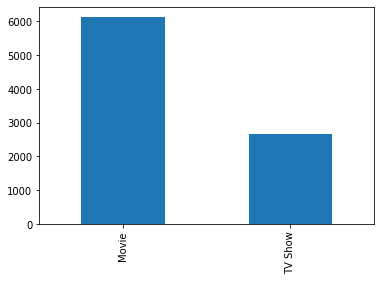

In [854]:
df['type'].value_counts().plot(kind ='bar')

어떤해에 많이 출시 되었을까?

In [855]:
surge_year = df.loc[df['release_year']>2005,['release_year']].astype('int')

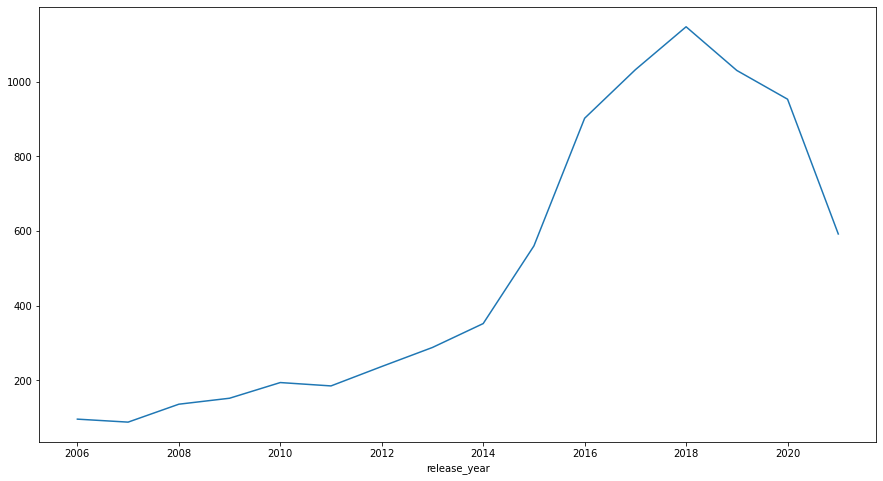

In [856]:
surge_year.groupby('release_year')['release_year'].count().plot(kind='line',figsize=(15,8))

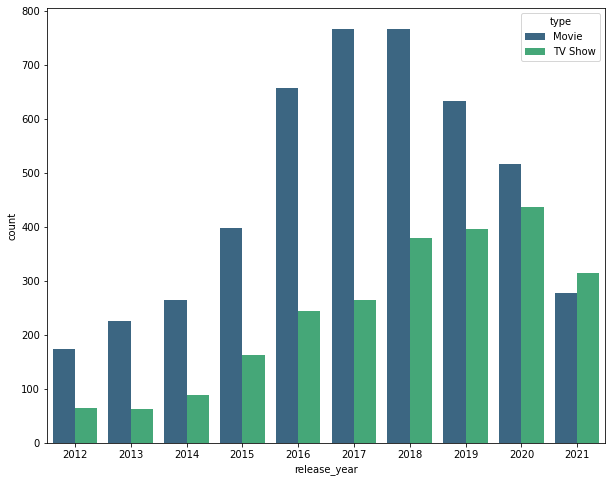

In [857]:
plt.figure(figsize=(10,8))
last_years = data[["type","release_year"]]
last_years=last_years[last_years["release_year"] >= 2012]
sns.countplot(x="release_year", data=last_years, hue="type", palette="viridis")

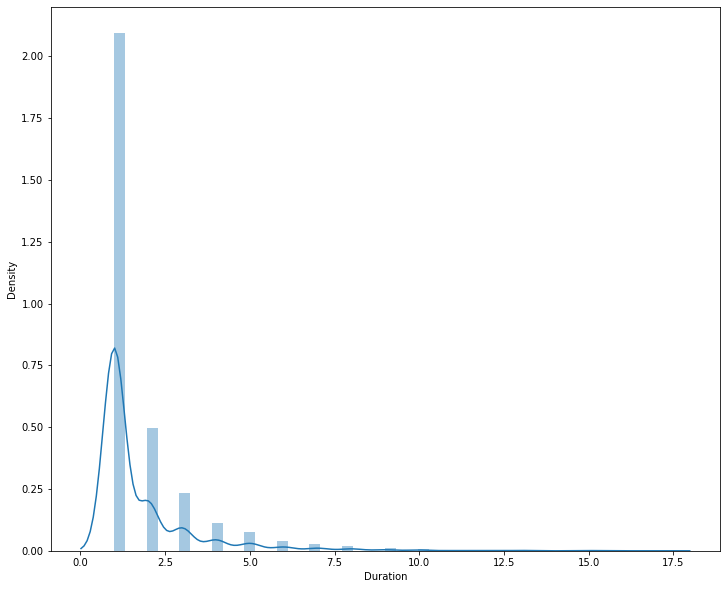

In [858]:
plt.figure(figsize=(12,10))
sns.distplot(df_TV['Duration'])


* 넷플릭스 TV Sohw에는 시즌 1이 많다

## 대륙별 - TV Show 빈도수

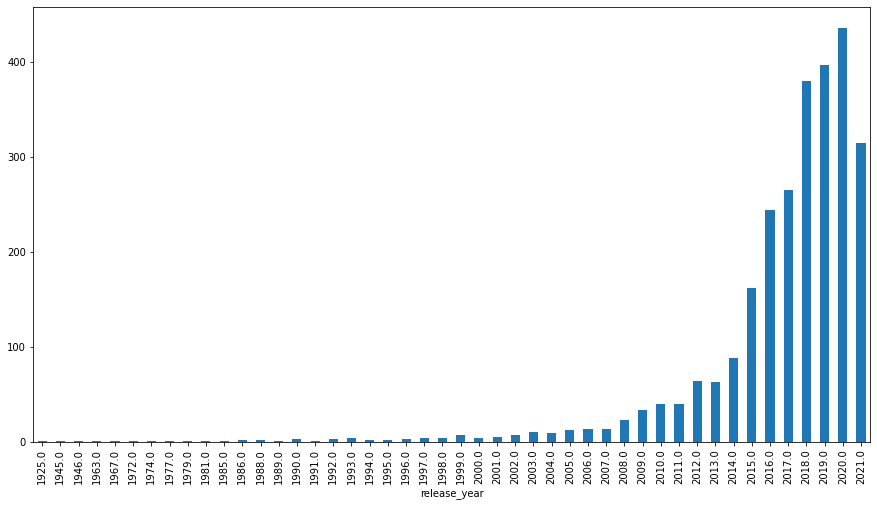

In [859]:
df_TV.groupby('release_year')['Continent'].count().plot(kind='bar',figsize=(15,8))

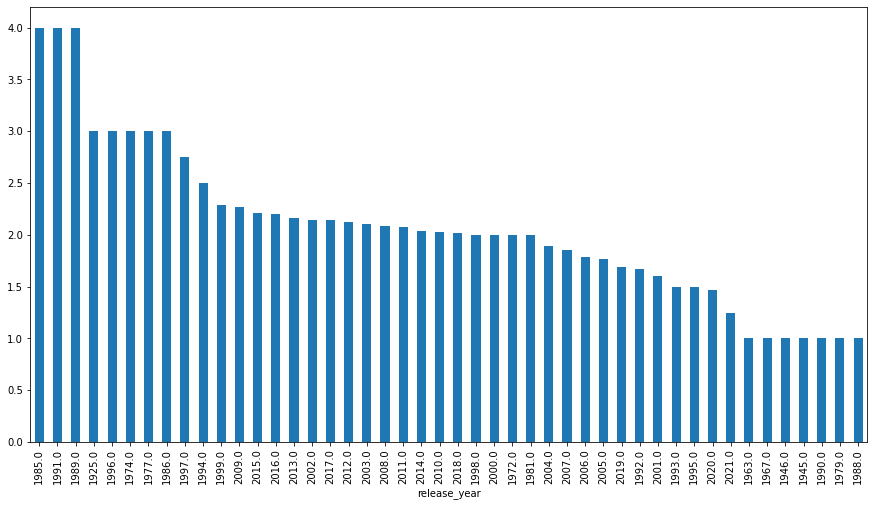

In [860]:
df_TV.groupby(['release_year'])['Continent'].mean().sort_values(ascending = False).plot(kind='bar',figsize=(15,8))



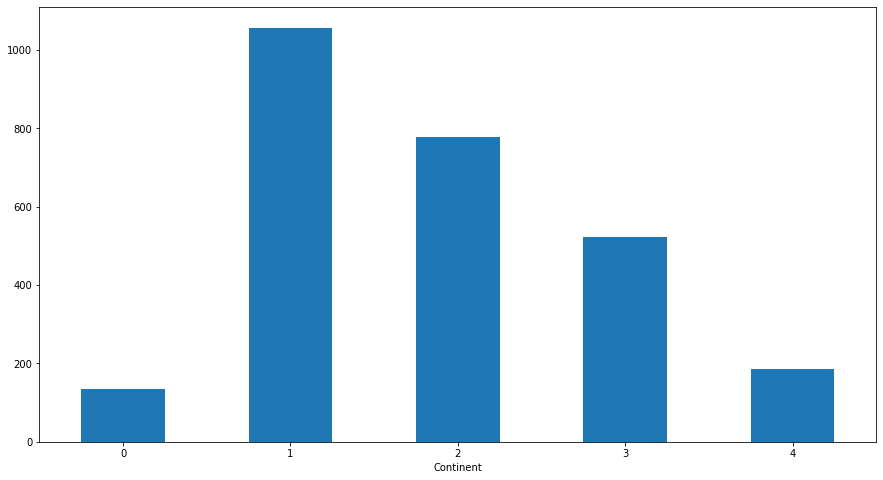

In [861]:
df_TV.groupby(['Continent'])['release_year'].count().plot(kind='bar',rot=0,figsize=(15,8))

* 0: 아프리카 | 1: 아메리카 | 2: 아시아| 3:유럽| 4:오세아니아

> 아메리카 대륙에서 TV Show 많이 제작되어지고 있으며, 그 다음 아시아에서도 많은 TV Show가 제작되어지고 있다 

> 이는 아메리카만의 고유한 문화 (예능 인프라 때문이 아닐까 추측한다)

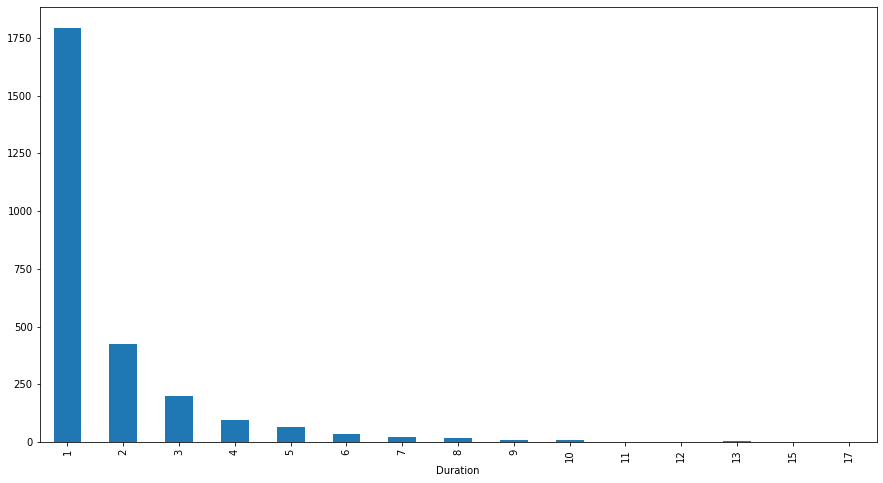

In [862]:
df_TV.groupby('Duration')['Continent'].count().plot(kind='bar',figsize=(15,8))

In [863]:
df_TV

,type,title,release_year,rating,listed_in,description,Continent,Duration,Registered year,Registered month,Registered day
1,TV Show,Blood & Water,2021.0,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,2,2021.0,9.0,24.0
2,TV Show,Ganglands,2021.0,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,1,2021.0,9.0,24.0
3,TV Show,Jailbirds New Orleans,2021.0,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,1,2021.0,9.0,24.0
4,TV Show,Kota Factory,2021.0,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,2,2021.0,9.0,24.0
5,TV Show,Midnight Mass,2021.0,TV-MA,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,1,2021.0,9.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,2015.0,TV-Y7,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,4,2,2018.0,5.0,1.0
8796,TV Show,Yunus Emre,2016.0,TV-PG,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2,2,2017.0,1.0,17.0
8797,TV Show,Zak Storm,2016.0,TV-Y7,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,4,3,2018.0,9.0,13.0
8800,TV Show,Zindagi Gulzar Hai,2012.0,TV-PG,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2,1,2016.0,12.0,15.0


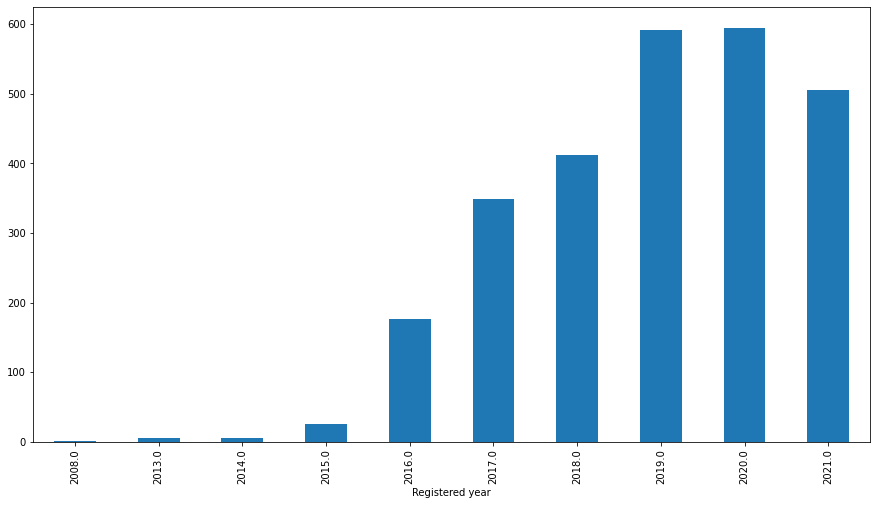

In [864]:
df_TV.groupby('Registered year')['Continent'].count().plot(kind='bar',figsize=(15,8))

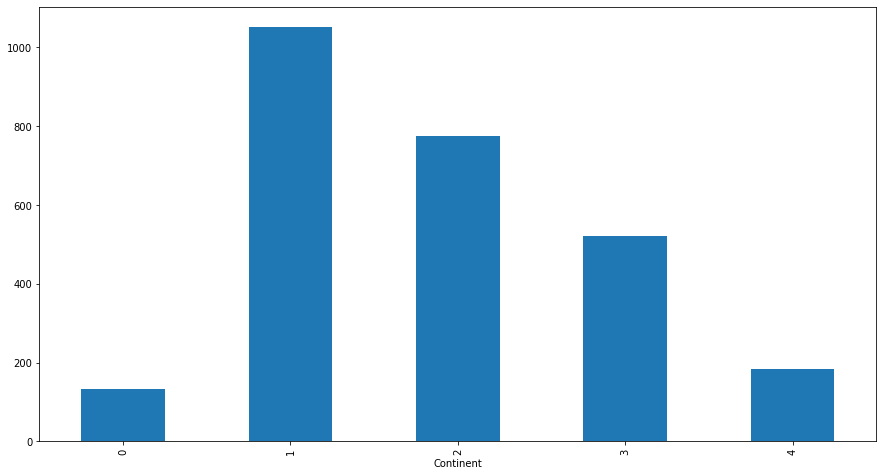

In [865]:
df_TV.groupby('Continent')['Registered year'].count().plot(kind='bar',figsize=(15,8))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

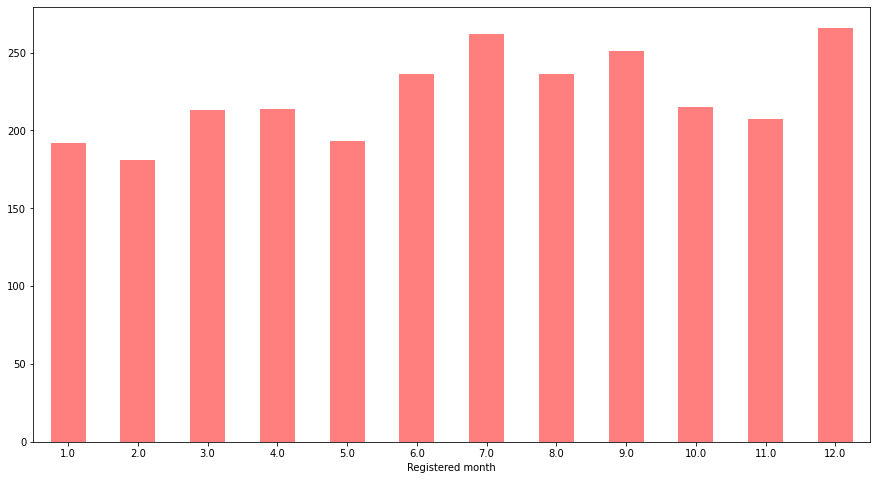

In [866]:
df_TV.groupby('Registered month')['Continent'].count().plot(kind='bar',color='red',alpha=0.5,figsize=(15,8))
plt.xticks(rotation=360)

___

In [867]:
from collections import Counter
genrePerShow=[]
totalGenreShow = []

for i in df_TV['listed_in']:
    if(type(i)==str):
        g = i.split(',')
        for genre in g:
            totalGenreShow.append(genre.strip())

In [868]:
storeCountOfShowGenre =Counter(totalGenreShow)
finalSortedListOfShowGenre ={k: v for k,v in sorted(storeCountOfShowGenre.items(),key=lambda x : x[1],reverse=True)}
finalSortedListOfShowGenre

{'Anime Series': 176,
 'British TV Shows': 253,
 'Classic & Cult TV': 28,
 'Crime TV Shows': 470,
 'Docuseries': 395,
 'International TV Shows': 1351,
 "Kids' TV": 451,
 'Korean TV Shows': 151,
 'Reality TV': 255,
 'Romantic TV Shows': 370,
 'Science & Nature TV': 92,
 'Spanish-Language TV Shows': 174,
 'Stand-Up Comedy & Talk Shows': 56,
 'TV Action & Adventure': 168,
 'TV Comedies': 581,
 'TV Dramas': 763,
 'TV Horror': 75,
 'TV Mysteries': 98,
 'TV Sci-Fi & Fantasy': 84,
 'TV Shows': 16,
 'TV Thrillers': 57,
 'Teen TV Shows': 69}

In [869]:
keysShowGenre = list(finalSortedListOfShowGenre.keys())
keysShowGenre = keysShowGenre[1:]

valuesShowGenre = list(finalSortedListOfShowGenre.values())
valuesShowGenre = valuesShowGenre[1:]

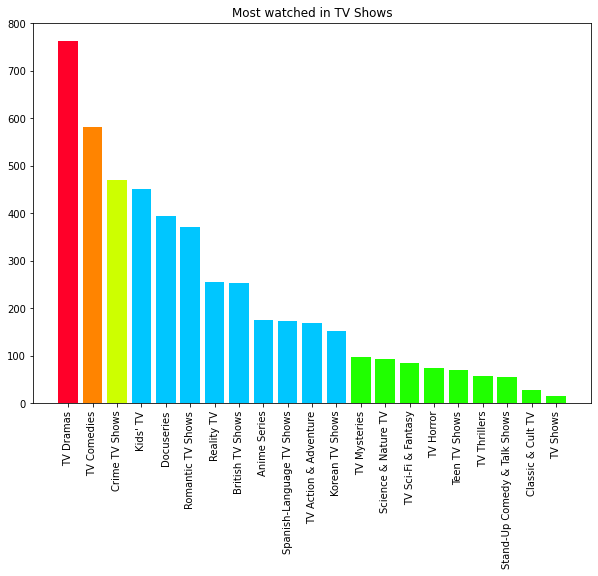

In [933]:
dataColorGenre = [0,1,2,5,5,5,5,5,5,5,5,5,3,3,3,3,3,3,3,3,3]
my_cmap = cm.get_cmap('gist_rainbow')
my_norm = Normalize(vmin=0, vmax=8)

plt.figure(figsize=(10,7))
plt.bar(keysShowGenre, valuesShowGenre, color=my_cmap(my_norm(dataColorGenre)))
plt.title("Most watched in TV Shows")
plt.xticks(rotation=90)
plt.show()